In [62]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

In [4]:
dados_churn = pd.read_json("data/dataset-telecon.json")
dados_churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [5]:

dados_churn['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [6]:
pd.json_normalize(dados_churn['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [7]:
pd.json_normalize(dados_churn['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


# Transformando dados em uma tabela


In [14]:
with open("data/dataset-telecon.json") as f:
  json_bruto = json.load(f)

In [15]:
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [16]:
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


## Identificando os tipos de dados

O método info() do Pandas é uma função muito útil para obter informações sobre um DataFrame. Ele exibe informações como o número de valores não nulos em cada coluna, o tipo de dados de cada coluna e a quantidade de memória usada pelo DataFrame.

Isso pode ajudar a identificar rapidamente possíveis problemas com os dados, como valores ausentes ou tipos de dados incorretos. Além disso, o método info() também pode ser usado para verificar se há problemas de desempenho no uso da memória do sistema, especialmente em grandes conjuntos de dados.


In [17]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

### Modificando o tipo de dado

In [18]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

ValueError: could not convert string to float: ' '

Mas perceba que apareceu um erro, pois não dá para converter valor ' ' (string contendo somente espaços) para float....

In [19]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].head()



,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [20]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [21]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index


Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [22]:
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index


In [23]:
dados_normalizados.loc[idx, "conta.cobranca.Total"] = dados_normalizados.loc[idx, "conta.cobranca.mensal"] * 24


In [24]:
dados_normalizados.loc[idx, "cliente.tempo_servico"] = 24


In [25]:
dados_normalizados.loc[idx][
['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]


,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


### Modificando o tipo da coluna
Para realizar o cast, criaremos uma nova célula abaixo da última tabela retornada, copiaremos o código da primeira tentativa de cast realizada e colaremos nessa nova célula.

In [26]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)
dados_normalizados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

Com isso, confirmamos que conseguimos limpar e tratar a string vazia que atrapalhava a tipagem correta da nossa coluna.

Já temos a tipagem correta em todas as colunas, mas não sabemos exatamente os valores presentes em cada uma delas.

Fazer o cast das colunas para as tipagens corretas é importante antes de inserir em um modelo de machine learning por diversos motivos:

Precisão dos resultados Ao fazer o cast das colunas para suas tipagens corretas, garantimos que os dados estejam representados de forma precisa e sem perda de informações. Por exemplo, se uma coluna contém números decimais e for representada como um tipo de dado inteiro, a precisão será perdida, o que pode levar a resultados incorretos no modelo de machine learning.

Velocidade de processamento Quando os dados são armazenados em seu tipo de dado correto, o processamento dos dados é mais rápido. Por exemplo, o uso de floats de menor precisão como float32 em vez de float64 pode reduzir a carga computacional em operações de ponto flutuante já que exigem menos cálculos e até mesmo reduz o armazenamento.

Compatibilidade do modelo Modelos de machine learning podem ter requisitos específicos em relação aos tipos de dados que podem ser usados como entrada. Portanto, fazer o cast das colunas para as tipagens corretas garante a compatibilidade do modelo.

Evita erros Quando as colunas são convertidas para seus tipos corretos, erros de dados são menos propensos a ocorrer, porque, em machine learning, o modelo é treinado com base em padrões e relações identificadas nos dados de treinamento. Se os dados contêm erros, isso pode afetar a precisão do modelo e fazer com que ele produza resultados imprecisos.

Em resumo, fazer o cast das colunas para suas tipagens corretas é uma etapa importante na preparação dos dados para serem processados por um modelo de machine learning e pode ajudar a garantir que o modelo seja preciso e eficiente.

### Visualizaremos o conteúdo presente em cada coluna de dados_normalizados

Fizemos o cast da nossa coluna, transformando o seu tipo para float.

Visualizaremos o conteúdo presente em cada coluna de dados_normalizados. Para isso, executaremos o comando abaixo, onde há um for que percorrerá cada nome, dentro do qual fazemos três prints que passam, respectivamente:

Uma f-string para visualizar o nome da coluna{col} a cada repetição do laço
Uma referência da coluna visualizada junto aos valores únicos presentes nela
Um "-" * 30 para exibir 30 traços para organização do retorno

In [27]:
for col in dados_normalizados.columns:
    print(f"Coluna: {col}")
    print(dados_normalizados[col].unique())
    print("-" * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

### Filtrando com o método query


Vamos adicionar um dados_normalizados.query() cujos parênteses receberão o comando Churn == '' entre aspas duplas. Por meio dele, informamos que queremos filtrar os locais onde o nome da coluna a ser manipulada (Churn) é igual à string vazia.

In [28]:
dados_normalizados.query("Churn == ''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


### Descartando amostras


Na última célula vazia que criamos, adicionaremos o dados_normalizados junto a uma filtragem com a notação de colchetes. Entre os colchetes, para referenciar a coluna Churn, adicionaremos novamente o dados_normalizados com um par de colchetes, que receberá em seu interior essa coluna entre aspas simples.

Queremos todas as amostras que sejam diferentes de um valor vazio. Para isso, à direita de dados_normalizados['Churn'], adicionaremos a expressão != junto a um par de aspas simples que representa este valor vazio.

In [29]:
dados_normalizados[dados_normalizados['Churn'] != '']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [30]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != '']

Considerando que queremos trabalhar de forma independente com o novo dataframe dados_sem_vazio, precisamos criar uma cópia independente. Desta forma, caso alteremos o novo dataframe, o antigo não será afetado.

### Criando uma cópia do dataframe


Para criar uma cópia independente, adicionaremos no final do comando anterior um .copy().

In [31]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [32]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

In [ ]:
### Corrigindo o índice das amostras


Para sequenciar os índices, utilizaremos o método reset_index do Pandas.

In [33]:
dados_sem_vazio.reset_index()

,index,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


Na saída, veremos que foi criado um outro dataframe com os índices reconfigurados, partindo de 0 até chegar em 7117. Contudo, foi criada a coluna Index com os índices antigos, que vão de 0 a 7343.

Já que não queremos os índices antigos, adicionaremos entre os parênteses do reset_index():

Um drop=True que retirará a coluna Index
Um inplace=True que alterará diretamente o dados_sem_vazio

In [34]:
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [35]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [ ]:
# Removendo dados duplicados e nulos

Já realizamos alguns tratamentos na base de dados, por exemplo, a remoção de strings vazias, o casting da coluna para modificar o tipo da coluna e o reset de seu índice. Com isso, melhoramos a base de dados.

Contudo, ainda há outros tratamentos que devemos nos atentar sempre que trabalhamos com uma base de dados para ser inserida no modelo de machine learning.

## Identificando dados duplicados

O primeiro tratamento é verificar se existem amostrar duplicadas. Para isso, voltamos ao notebook do Google Colab. Antes de começar, o que são amostras duplicadas?

Amostras duplicadas são dados que possuem os mesmos valores em colunas correspondentes.

Por exemplo, não há distinção da amostra A para amostra B, justamente porque todos os valores de colunas correspondentes são iguais. Por isso, transmitem apenas uma informação.

### Como verificamos se há amostras duplicadas em nosso conjunto de dados?

Podemos recorrer à biblioteca Pandas que oferece o método duplicated(). Para usá-lo, vamos escrever a variável da aula passada chamada dados_sem_vazio e acrescentar o método .duplicated().

O False é retornado quando a amostra não é duplicada, enquanto o True indica que a amostra é duplicada. Por exemplo, a amostra de índice 0 tem retorno False, o que indica que a amostra não é um valor duplicado. Em contrapartida, a amostra de índice 7117 é igual à alguma amostra anterior do banco, pois tem retorno True.



In [36]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

### Quantidade de dados duplicados


Agora que sabemos que existem amostrar duplicadas em nosso conjunto de dados, como fazemos para verificar quantas são?

Na próxima célula, vamos copiar o código anterior e acrescentar .sum() ao final.

O True vai ser interpretado como 1 e o False como 0. Dessa forma, vamos ter a soma das amostras duplicadas no conjunto de dados. Executamos a célula com "Shift + Enter".




In [37]:
dados_sem_vazio.duplicated().sum()

75

### Quais são os dados duplicados?


Para isso, vamos criar um filtro chamado de filtro_duplicadas que vai ser igual à dados_sem_vazio.duplicated(). Para verificar que é o mesmo valor, podemos escrever a variável filtro_duplicadas em uma nova linha.

In [38]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

O retorno será novamente a series booleana de 7118 linhas.

Agora, podemos passar esse filtro para o nosso conjunto de dados. Para isso, digitamos dados_sem_vazio[] em uma nova célula. Entre os colchetes passamos filtro_duplicadas. Dessa forma, vamos verificar quais são as amostras duplicadas.



In [39]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


## Tratamento de dados duplicados


Com isso, já sabemos quantas e quais são as amostras, além de como localizá-las no conjunto de dados. Mas, o que fazer com essas amostras? Devemos removê-las do banco de dados.

Podemos citar três motivos principais para a remoção das amostras duplicadas:

Viés do modelo: se há amostras duplicadas no conjunto de dados, pode ser que o modelo de machine learning dê mais importância para essas amostras repetidas.
Melhora do desempenho do modelo: se inserimos amostras duplicadas, vão ser necessários mais cálculos e poder de processamento, além de ser um desperdício computacional trabalhar com amostras com o mesmo valor e que transmitem a mesma informação.
Aumento da qualidade dos resultados: vamos inserir informações únicas, sem dados repetidos. Ou seja, vão ser mais relevantes para o modelo.
A biblioteca Pandas oferece o método drop_duplicates() para retirar amostras duplicadas.

Para isso, escrevemos dados_sem_vazio seguido de .drop_duplicates(). Entre os parênteses, vamos passar o parâmetro inplace igual à True para que a remoção seja realizada no próprio dataframe dados_sem_vazio em que o método foi chamado - sem precisar fazer qualquer atribuição.



In [40]:
dados_sem_vazio.drop_duplicates(inplace=True)

Para verificar se as amostras foram retiradas, vamos novamente digitar dados_sem_vazio.duplicated().sum() para conferir quantas são as amostras duplicadas.


In [41]:
dados_sem_vazio.duplicated().sum()

0

Agora há zero amostras duplicadas, ou seja, foram removidas com sucesso.

Amostras duplicadas são linhas que contêm exatamente os mesmos valores em todas as colunas. Ou seja, são cópias exatas de outras linhas presentes no conjunto de dados. Essas amostras podem ser geradas por vários motivos, como erros de importação de dados ou redundância nas fontes de dados.

Identificar e remover amostras duplicadas é uma prática importante para análise de dados e machine learning. O Pandas fornece várias funções para trabalhar com dados duplicados, como a função duplicated() que retorna uma série booleana indicando quais linhas são duplicadas; e a função drop_duplicates() que remove as linhas duplicadas de um DataFrame.

Remover amostras duplicadas pode aumentar a capacidade de generalização do modelo. A remoção de amostras duplicadas pode ajudar a reduzir o viés do modelo, melhorar o desempenho e aumentar a qualidade dos resultados. Nessa remoção, o modelo é treinado com dados de alta qualidade e pode generalizar melhor para novos dados, pois ele não está sendo influenciado por amostras repetidas que podem ter mais peso do que deveriam.

Outro problema que causa dificuldades quando trabalhamos com dados para serem inseridos em modelos de machine learning são os dados nulos.

## Identificação de dados nulos

Mas, afinal, o que são dados nulos?

Dados nulos são valores que estão ausentes ou são desconhecidos na base de dados.

Em uma célula vazia, vamos digitar a variável dados_sem_vazio seguido do método .isna(). Em uma tradução livre is N/A (sigla para not available) significa "é nulo" ou "não está disponível".

In [42]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


foi retornado um dataframe com 7043 linhas de uma série de valores booleanos com True ou False. Por exemplo, a coluna "id_cliente" da linha de índice 0 possui valor False. Isso significa que essa amostra não é nula.

Se analisamos as colunas "conta.cobranca.Total" e "conta.cobranca.mensal" da linha de índice 0, verificamos que elas possuem valor True. Isso significa que essas amostras são nulas.

Com isso, confirmamos que existem dados nulos em nosso conjunto de dados. Porém, está difícil tirar informações dessa visualização por tabela. Por exemplo, quantos dados nulos existem nesse conjunto de dados? Quais são as colunas que possuem dados nulos?

### Quantos e quais são dados nulos?


Para isso, em uma nova célula, vamos copiar o código anterior e acrescentar .sum() ao final. Desse modo, vamos somar a quantidade de amostras nulas por coluna.

In [43]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

Com esse retorno, verificamos que nas colunas "churn" e "cliente.genero" existem 0 amostras vazias, enquanto na coluna "cliente.tempo_servico" existem 8 amostras nulas.

Em suma, existem colunas que possuem valores nulos e outras que não possuem. Mas, como verificar o total de valores nulos presentes no banco de dados?

Para isso, vamos copiar o código que fizemos com o método sum() e acrescentar outro .sum() ao final. Esse segundo sum() vai somar a quantidade total de valores nulos no banco de dados.



In [44]:
dados_sem_vazio.isna().sum().sum()

114

Após executar a célula, temos um total de 114 valores nulos no conjunto de dados. Mas, essa não é a quantidade de amostras com valores nulos, porque algumas amostras podem possuir mais de um valor nulo.

Por exemplo, na saída onde tivemos o dataframe de True e False, verificamos que a amostra de índice 0 possui 5 valores True. Ou seja, os valores desde a coluna "conta.contrato" até "conta.cobranca.Total" são nulos. Cada um desses valores conta para a soma de 114, mas são de apenas uma amostra.

Como obter a informação de quantas amostras diferentes possuem dados nulos?

Para isso, vamos fazer um filtro ao escrever dados_sem_vazio[]. Entre os colchetes, repetimos dados_sem_vazio e usamos o método .isna().any(), passando axis igual à 1 para fazer referência a coluna.



In [45]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


Esse código retornou um dataframe com 45 linhas que correspondem as amostras que contêm pelo menos um valor nulo em alguma das colunas. É isso que o any(axis=1) significa.

Mas, o que podemos fazer com essas 45 amostras que contêm algum dado nulo? Temos duas opções:

Remover as amostras;
Substituir os dados nulos por outros valores.


### Substituição dos dados nulos


Primeiro, vamos analisar o caso de fazer o preenchimento dos nulos por outros valores. Afinal, se removemos amostras, também removemos informações que podem ser relevantes.

Se voltamos a analisar a tabela que nos informa as colunas que possuem dados nulos, percebemos que a coluna "cliente.tempo_servico" que contém 8 valores nulos tem relação com outras colunas.

Se dividimos a coluna "conta.cobranca.Total" pela coluna "conta.cobranca.mensal", obtemos o valor da coluna "cliente.tempo_servico".

Por isso, vamos verificar quais amostras tem nulos na coluna "cliente.tempo_servico". Para isso, digitamos o dataframe dados_sem_vazio[] e, entre colchetes e aspas, selecionamos a coluna que queremos, cliente.tempo_servico. Fora dos colchetes, adicionamos .isna().



In [46]:
dados_sem_vazio['cliente.tempo_servico'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente.tempo_servico, Length: 7043, dtype: bool

In [47]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

Após executar, o filtro foi criado sem retornos visíveis.

Agora, podemos usar esse filtro. Podemos fazer dados_sem_vazio[filtro] para filtrar o dataframe inteiro.

Mas, queremos verificar somente as três colunas com relações entre si. Por isso, abrimos colchetes para selecionar as colunas e depois abrimos outros colchetes para selecionar a seguinte lista de colunas: cliente.tempo_servico, conta.cobranca.mensal, conta.cobranca.Total. Todas entre aspas.



In [48]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


Os valores da coluna "cliente.tempo_servico" são representados pela NaN que significa not a number (não é um número). E também temos todos os valores das colunas "conta.cobranca.mensal" e "conta.cobranca.Total". Consequentemente, temos informação suficiente para substituir os valores de "cliente.tempo_servico".

Por exemplo, para calcular o valor de "cliente.tempo_servico" da amostra de índice 9, poderíamos dividir 5957.90 por 90.45 que resultaria em um valor quebrado de meses.

5957.90/90.45  =   65.86954118297402

Só que os valores já presentes em "cliente.tempo_servico" não são quebrados. Portanto, devemos arrendondar esse valor para cima. Para isso, vamos utilizar um método da biblioteca NumPy.

Primeiro, vamos importar a biblioteca com import numpy, apelidando-a de np. Agora, podemos utilizar o método np.ceil() na divisão que realizamos.

In [50]:
np.ceil(5957.90/90.45)

66.0

Dessa forma, o número foi arrendondado para cima e agora tem o valor de 66.0.

O que vamos fazer e quais são os passos? Primeiro, vamos dividir a coluna "conta.cobranca.Total" pela coluna "conta.cobranca.mensal". Vamos colocar essa divisão dentro do método np.ceil() para arrendondar para cima caso o valor seja quebrado. Por fim, vamos colocar o valor desse arredondamento no lugar dos valores NaN da coluna "cliente.tempo_servico".

Para isso, em uma nova célula, fazemos referência a coluna que queremos preencher dados_sem_vazio['cliente.tempo_servico']. Fora dos colchetes, utilizamos o método do Pandas chamado .fillna() para preencher dados nulos.

Na abertura dos parênteses de fillna(), vamos dar um "Enter" para fazer a quebra de linha e melhorar a visualização. Como queremos arrendondar o resultado da divisão, vamos escrever o método np.ceil() dentro do fillna() e também dar um "Enter" na abertura dos parênteses.

Dentro do np.ceil(), vamos escrever a coluna dados_sem_vazio['conta.cobranca.Total'], barra de divisão e a coluna dados_sem_vazio['conta.cobranca.mensal']. Com isso, o resultado da divisão será colocado onde tem nulos na coluna "cliente.tempo_servico".

Fora do np.ceil(), mas dentro de fillna(), vamos colocar o parâmetro inplace igual à True para fazer a modificação inloco, ou seja, no dataframe dados_sem_vazio.



In [51]:
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']
    ), inplace=True
)

Executamos a célula sem apresentar nenhum erro.

Agora, vamos conferir se essa divisão e substituição realmente funcionou. Para isso, vamos copiar o código onde utilizamos o filtro para mostrar as três colunas que trabalhamos.



In [52]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


Perceba que agora a coluna "cliente.tempo_servico" tem valores não nulos. Por exemplo, valores de 66.0 na primeira amostra, 13.0 na segunda amostra, 5.0 na terceira amostra e assim por diante. Isso significa que a nossa divisão foi bem sucedida e o arredondamento também, pois o valor não está quebrado.

Mas, será que não existe mais valor nulo nessa coluna? Vamos fazer a soma novamente com o método isna():



In [53]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

Agora, não existem mais dados nulos na coluna "cliente.tempo_servico". Conseguimos fazer a tratativa ao inserir os valores corretos sem perder informações.

Contudo, ainda existem outras colunas no banco de dados que possuem valores nulos. Por exemplo, a coluna "conta.contrato" tem 31 valores nulos



### Outros métodos


Quando trabalhamos com dados em uma análise ou em um modelo de machine learning, é importante garantir que esses dados sejam precisos e completos. Dados nulos, também conhecidos como dados faltantes ou ausentes, são um problema comum que pode prejudicar a precisão de qualquer análise ou modelo de machine learning.

Os dados nulos ocorrem quando não há informações disponíveis para determinada observação em um conjunto de dados. Isso pode acontecer por várias razões, como falhas no registro dos dados, perda de informações ou até mesmo erros humanos. Quando esses dados nulos são inseridos em um modelo de machine learning, o modelo pode interpretar erroneamente a falta de informação como algo significativo, resultando em um modelo enviesado ou impreciso, ou muitas vezes o algoritmo nem ao menos roda.

Por isso, é importante tratar esses dados antes de inserir em um modelo de machine learning. Existem várias técnicas que podem ser utilizadas para tratar dados nulos, como: a exclusão das observações que possuem dados faltantes e a imputação de valores faltantes com base em outros dados do próprio conjunto de informações.

A exclusão de observações com dados faltantes pode ser uma opção viável quando sua quantidade é pequena em comparação ao tamanho do conjunto de dados, ou quando a exclusão não prejudica a representatividade dos dados. No entanto, essa abordagem pode levar a perda de informações importantes e diminuir a capacidade do modelo de aprender.

A imputação de valores faltantes é uma técnica comum para tratar dados nulos. Ela consiste em substituir os dados faltantes por um valor estimado com base em outros dados disponíveis. Existem vários métodos de imputação, como: média, mediana, moda ou até mesmo modelos de machine learning específicos para imputação.

Existem alguns métodos da biblioteca Pandas que nos auxiliam a identificar quais são dados nulos em nosso DataFrame, como:

isnull(): retorna um DataFrame de valores booleanos, no qual True indica o valor nulo e False indica o valor válido.
notnull(): retorna um DataFrame de valores booleanos, no qual True indica o valor válido e False indica o valor nulo.
isna(): retorna um DataFrame de valores booleanos, com True indicando o valor nulo e False o valor válido (a mesma funcionalidade do método isnull()).
notna(): retorna um DataFrame de valores booleanos, em que True indica o valor válido e False indica o valor nulo (a mesma funcionalidade do método notnull()).


Em resumo, o tratamento de dados nulos é fundamental para garantir que um modelo de machine learning tenha uma precisão elevada e uma capacidade de generalização adequada. O uso de técnicas adequadas de tratamento de dados nulos é um passo importante no processo de preparação de dados para qualquer análise ou modelo de machine learning.


## Retirando dados nulos

In [ ]:
Agora, vamos analisar as colunas que ainda apresentam valores nulos em suas amostras: conta.contrato, conta.faturamente_eletronico, conta.metodo_pagamento, conta.cobranca.mensal e conta.cobranca.Total.

O primeiro detalhe que percebemos é que essas colunas vieram da mesma chave original do JSON, a conta. Pois, todas começamos com conta. e um complemento. Mas, será que dá para fazer inserção de dados nessas colunas, assim como fizemos no vídeo passado?

Por exemplo, conseguimos substituir os valores nulos na coluna conta.contrato pelo valor mais frequente, ou seja, a forma de contrato que mais aparece?



### Valor mais frequente

Como precisamos descobrir qual é esse valor mais frequente, vamos utilizar um método do Pandas chamado value_counts().

Em uma nova linha do notebook do Google Colab, vamos digitar dados_sem_vazio e passar entre colchetes e aspas simples a coluna que queremos analisar, conta.contrato. Fora dos colchetes, vamos adicionar o método .value_counts().

In [54]:
dados_sem_vazio['conta.contrato'].value_counts()

conta.contrato
mes a mes    3861
dois anos    1688
um ano       1463
Name: count, dtype: int64

Assim, poderíamos pensar em inserir o mes a mes para os valores que são nulos nessa coluna. Porém, não vamos fazer isso porque dessa forma afetaríamos os dados pelos seguintes motivos:

Viés nos dados: o modelo de machine learning vai tentar procurar padrões que vão estar incorretos, pois não são os dados reais. Isso pode levar a previsões enganosas, incorretas e que não são satisfatórias.
Distorção de resultados: inserir um valor que não é o correto faz com que o modelo aprenda com dados incorretos e, consequentemente, levam a previsões que podem ser incorretas.
Por isso, não vamos inserir o valor mais frequente como valor para os dados nulos. Para fazer a inserção dessa forma, precisaríamos fazer análises mais rebuscadas que estão fora do escopo do curso, como análise de regressão e construção de outros modelos de aprendizado não-supervisionado.



### Remoção de dados nulos


Então, o que vamos fazer? Vamos analisar três colunas, conta.contrato, conta.faturamento_eletronico e conta.metodo_pagamento, para retirar essas amostras, já que não temos como inferir com exatidão quais são os seus valores.

Não vamos analisar conta.cobranca_mensal e conta.cobranca.Total, pois aprendemos que possuem relação com cliente.tempo_servico e talvez possamos inferir esses dados de forma correta.

O primeiro passo é selecionar as colunas de onde vamos dropar, ou seja, retirar dados. Para isso criamos uma nova coluna chamada colunas_dropar que vai ser igual a uma lista com conta.contrato, conta.faturamento_eletronico e conta.metodo_pagamento. Cada uma entre aspas simples e separadas por vírgula.

In [55]:
colunas_dropar = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

Após executar a célula, não temos um retorno visível, mas temos uma variável com a lista das colunas de onde vamos retirar amostras.

Mas, quantas são as diferentes amostras que possuem pelo menos uma coluna com valor nulo?

Já aprendemos como fazer esse filtro, basta fazer dados_sem_vazio[] e passar a variável colunas_dropar que contém as colunas que estamos trabalhando. Fora dos colchetes, acrescentamos isna(). Isso retornaria apenas um dataframe com as três colunas com valores True e False para dados nulos.

Mas, como queremos visualizar as amostras que contém pelo menos uma dessas colunas com valor nulo, vamos acrescentar .any() com axis igual à 1. Isso retornaria uma series booleana. Por fim, acrescentamos .sum() no final do código para visualizar somente a quantidade somada.


In [56]:
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

37

Sabemos que são 37 amostras que tem pelo menos um valor nulo nas colunas conta.contrato, conta.faturamento_eletronico e conta.metodo_pagamento.


### Método dropna()


Agora, vamos retirar de fato essas 37 amostras com um método do Pandas chamado dropna(), cujo nome significa "retirar valores nulos".

Em uma nova célula, vamos colocar dados_sem_vazio seguido do nome do método .dropna(). Existe um parâmetro para o método dropna() chamado subset com o qual podemos colocar o subconjunto que queremos retirar os dados nulos. Nesse caso, o subset vai ser igual à colunas_dropar.

In [57]:
dados_sem_vazio.dropna(subset=colunas_dropar)

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


O retorno é um subconjunto do dataframe com 7006 linhas e 21 colunas. Contudo, o índice não começa mais em 0, e sim em 1. Isso porque o índice 0 continha dados nulos em algumas das três colunas. Assim, essa amostra foi retirada quando demos o dropna().

Agora existem 7006 amostras no banco de dados, sendo o último índice 7042. O que significa que existem alguns índices que foram saltados. Vamos nos preocupar com esse problema mais adiante.

Mas, primeiro, vamos salvar o subconjunto em um novo dataframe. Para isso, antes de dados_sem_vazio.dropna(), vamos digitar a variável df_sem_nulo e o sinal de igual. Mas, como queremos uma cópia independente do subconjunto, acrescentamos .copy() ao final da linha.

Na próxima linha, escrevemos df_sem_nulo.head() para visualizar se o comando deu certo.



In [58]:
df_sem_nulo = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulo.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


Agora o nosso dataframe está independente. Assim, podemos alterá-lo sem nos preocupar em alterar os dataframe original, dados_sem_vazio.



### Resetar índices


Porém, o índice do dataframe df_sem_nulo ainda inicia em 1, mas deveria iniciar em 0. Por isso, vamos resetar os índices devido a esses índices saltados que devem ser evitados em machine learning.

Em uma nova célula, vamos digitar df_sem_nulo.reset_index(). Se só executamos esse comando, viria um dataframe com a primeira coluna com os novos índices e, ao lado, uma coluna chamada index com os índices originais. Para evitar isso, devemos passar os parâmetros drop igual à True e inplace igual à True. Assim, vamos ter somente os novos índices e as alterações serão realizadas no próprio df_sem_nulo.

In [59]:
df_sem_nulo.reset_index(drop=True, inplace=True)

Ao executar essa célula com "Shift + Enter", a célula foi executada sem erros.

Por fim, podemos verificar a quantidade de dados nulos que continuam presentes em nosso banco de dados com df_sem_nulo.isna().sum().



In [60]:
df_sem_nulo.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

O retorno apresenta todas as colunas com 0 valores nulos. Isso significa que não existem mais dados nulos em nosso conjunto de dados.

Mas, cadê os dados nulos que estavam nas colunas de conta.cobranca.mensal e conta.cobranca.Total?

Os valores que estavam nulos nessas duas colunas estavam simultaneamente nulos nas três colunas que trabalhamos. Quando removemos as amostras com dados nulos nessas três colunas, também foram removemos as amostras que possuíam valores nulos em conta.cobranca.mensal e conta.cobranca.Total. Em outras palavras, eram as mesmas amostras.

Perfeito. Agora temos um conjunto de dados sem dados nulos.


## Outliers


Já trabalhamos com dados duplicados e dados nulos, mas agora conversaremos sobre um problema que é muito mais sutil de identificarmos, que são os Outliers, que são valores atípicos ou um ponto fora da curva. Em estatística, isso significa um dado que se distancia muito da distribuição padrão que os dados apresentam.

Então vamos voltar para o notebook para saber se nossos dados contém ou não outliers. Para isso, já deixei duas seções de markdown prontas, que são: "Trabalhando com outliers" e "Identificando os outliers". Também deixei a imagem de um boxplot (diagrama de caixa), que usaremos, logo em seguida, para identificarmos se nos nossos dados há ou não candidatos a outliers.

img/img.png

O boxplot, ou diagrama de caixa é, como o nome dá uma pista, uma caixa, ou seja, sua representação é um quadrado. No meio dessa caixa há uma linha, que chamamos de mediana, e é responsável por dividir nossos dados ao meio. Portanto, 50% dos dados estão na esquerda da caixa e os outros 50% estão na direita.

No canto superior esquerdo e no superior direito da caixa tem, sucessivamente, o Q1 e o Q3, que representam quartis, ou seja, valores que dividem o conjunto de dados em quatro partes iguais, cada uma contendo 25% dos dados. Então até Q1 temos 25% dos dados, representando o 1/4 com os menores dados.

A partir dele estão os 75% dos dados, onde o Q2 é a mediana e o Q3 contém os 25% dos dados que possui maior valor no banco de dados. Isso significa que até o Q3 tem 75% dos dados e, a partir dele, temos os 25% finais dos dados.

Acima do quadrado, e consequentemente do Q1 e Q3, temos o "IIQ = Q3-Q1". O IIQ representa o Intervalo Interquartil, que é a diferença do Q3 para o Q1.

À esquerda e à direita da caixa tem duas arestas. Na extremidade da aresta esquerda temos "Q1 - 1,5 x IIQ", que é a fórmula do nosso limite inferior. Na extremidade da aresta direita temos "Q3 + 1,5 x IIQ", que é a fórmula do limite superior. Os valores abaixo do limite inferior ou acima do limite superior são os chamados candidatos outliers, e é o que estamos procurando.

Eu apresentei o diagrama de caixa para o conhecermos. Antes de passarmos para ele, olharemos as estatísticas descritivas do nosso curso de dados. Para isso, em uma nova célula em branco, escreveremos df_sem_nulo.describe(). O df_sem_nulo é o DataFrame que estamos trabalhando, enquanto o .describe() é o método que estamos trabalhando.

Na tabela temos, como o índice do DataFrame que foi retornado, o "count", que é a contagem de amostras existentes, por exemplo, 7006 amostras. Em sequência, nessa coluna temos a média, o desvio padrão e o valor mínimo.

Mais abaixo temos o Q1, que representa os 25% menores valores, seguido do Q2 ou mediana, que seriam os 50%, depois o Q3, que são os 75%, como vimos no diagrama de caixa. A última linha da tabela contém o valor máximo (max)de cada coluna da tabela: cliente.idoso, cliente.tempo_servico, conta.cobranca.mensal e conta.cobranca.total.

Tem um detalhe muito interessante nessa tabela. A coluna "cliente.tempo_servico" tem seus valores em meses, sendo o valor máximo 1080 meses. Esse valor é muito alto! Se executarmos a conta 1080/12 em uma célula vazia, obteremos o resultado 90, ou seja, são 90 anos.

1080/12
COPIAR CÓDIGO
90.0

Isso é um pouco estranho. Será possível assinar um serviço de telefonia por 90 anos? Já percebemos que nessa coluna provavelmente tem outliers, então usaremos o boxplot para visualizarmos isso de uma forma melhor.

Para isso importaremos a biblioteca Seaborn, escrevendo, em uma célula vazia, import seaborn as sns.



<Axes: xlabel='cliente.tempo_servico'>

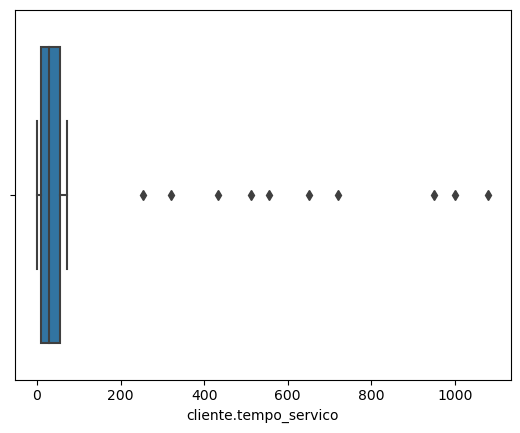

In [63]:
sns.boxplot(x=df_sem_nulo['cliente.tempo_servico'])


Usamos o sns para nos referenciar ao Seaborn, e o boxplot(). Dentro dos parênteses passamos que o x=df_sem_nulo, que é DataFrame com o qual estamos trabalhando. Depois, entre colchetes e entre aspas simples, escrevemos a coluna que queremos verificar o boxplot, que é a cliente.tempo_servico.

Pressionamos o "Shift + Enter" para executar a célula e tivemos como retorno um boxplot um pouco diferente do que vimos anteriormente. Isso acontece porque ele está distorcido devido aos pontos que existem à esquerda do diagrama, totalizando 10.

Notamos que a linha da mediana está por volta de 50. À direita temos vários pontos, sendo que de maior valor são por volta de 980, 1000 e 1100. Percebemos que esses são os candidatos a outliers.

Com isso, sabemos, de fato, que temos candidatos a outliers, mas não conseguimos identificar quais amostras são essas. Nossa intenção agora é identificá-los no nosso conjunto de dados. Para isso, na célula abaixo do diagrama, começaremos a fazer nossa seleção escrevendo:

In [64]:
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q1


9.0

Assim, definimos que a variável Q1. Passamos o nosso DataFrame df_sem_nulo e delimitamos a coluna cliente.tempo_servico. Em seguida, usamos o método quantile(), passando o .25, para selecionarmos o primeiro quartil.

Na linha abaixo escrevemos o Q1 para termos como retorno o valor de Q1. Ao pressionarmos "Shift + Enter" para executar, recebemos "9.0" como resultado.

Na célula com o código anterior, apagaremos o Q1 da segunda linha. Depois copiaremos o código de declaração de Q1 e colaremos na linha abaixo, fazendo algumas mudanças. Mudaremos de Q1 para Q3, já que no diagrama de caixa temos o Q1 e o Q3. Além disso, mudaremos de (.25) para (.75), para obtermos os 75%, como mencionado anteriormente.



In [65]:
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)


Ainda nessa célula, queremos o intervalo interquartil. Chamaremos essa variável de IQR, que é a forma que encontrarão nas literaturas, sendo que o "R" de "IQR" representa o range (amplitude/intervalo). Aprendemos a fórmula dele no boxplot, então, abaixo da declaração do Q3, codaremos IQR = Q3 - Q1.

Agora queremos os limites superior e inferior. Começaremos pelo limite inferior, escrevendo limite_inferior = Q1 - 1.5*IQR, sendo o IQR o intervalo interquartil definido anteriormente. Para o limite superior, podemos copiar o código anterior e fazer as mudanças necessárias, deixando como limite_superior = Q3 + 1.5*IQR.

In [66]:
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR


Temos nossas estatísticas com os exatos valores que observamos no modelo de boxplot anterior, apenas transformamos isso em código. Sendo assim, vamos pressionar "Shift + Enter" para executarmos nossa célula.

Após um rápido carregamento, nossa célula é executada. Agora faremos o filtro no nosso conjunto de dados a partir dessa medida. No nosso conjunto de dados, queremos valores que sejam menores que o limite inferior ou maiores que o limite superior.

Para isso, em uma nova célula escreveremos df_sem_nulo[], passando o nome da coluna dentro dos colchetes entre aspas simples, ou seja, 'cliente.tempo_servico. Escrevemos o sinal de menor que (<) e passamos o limite_inferior. Deixamos esse valor entre parênteses e usamos uma barra vertical (|) para representar o "ou".

Copiamos e colamos o código anterior depois da barra, mas mudamos o sinal de menor que pelo de maior que (>) e o limite_inferior pelo limite_superior. Em seguida, pressionamos "Shift + Enter" para executar o código.



In [67]:
(df_sem_nulo['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulo['cliente.tempo_servico'] > limite_superior)


0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

Percebemos que o retorno foi uma série de booleanos que podemos usar como filtro, pois são "true" (verdadeiro) ou "false" (falso). Sendo assim, vamos salvar esses dados em uma variável para usarmos como filtro.

Chamaremos essa variável de outliers_index, então, na célula anterior, onde escrevemos a fórmula, iremos igualar o código ao nome da variável. Em seguida, escreveremos o nome da variável na linha abaixo e executaremos o código novamente, para perceberem que é o mesmo retorno.



In [68]:
outliers_index = (df_sem_nulo['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulo['cliente.tempo_servico'] > limite_superior)
outliers_index


0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

Nossa intenção agora é saber quais são essas amostras. Para isso, passaremos esse filtro que acabamos de criar para o banco de dados. Se codarmos apenas df_sem_nulo[outliers_index], aparecerá todas as colunas do nosso DataFrame, mas contendo apenas as amostras que são outliers.

Porém, não queremos toda tabela, e sim os dados da coluna cliente.tempo_servico. Portanto, escreveremos df_sem_nulo[outliers_index]['cliente.tempo_servico'] e executaremos o código.



In [69]:
df_sem_nulo[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

No retorno, percebemos que o valor foi o mesmo que apareceu para nós no método `describe()`, que foi o 1080, que equivale a 90 anos. Em seguida temos o valor de 1000, que é um pouco menos que 90 anos, e assim por diante.

Esses valores estão muito estranhos, porque não é possível assinar um serviço de telefonia por tanto tempo. Agora precisamos descobrir que outliers são esses e que amostras são esses candidatos a outliers. Também descobriremos o que fazer com elas.



## Outliers na Ciência de Dados

A Ciência de Dados é uma área que utiliza técnicas estatísticas e computacionais para extrair insights e conhecimento a partir de dados. Durante o processo de análise exploratória dos dados, é comum notar a presença de outliers.

Esses valores podem ocorrer por diversos motivos, como erros de medição, erros de entrada de dados ou eventos raros. A presença de outliers pode afetar significativamente a análise dos dados, pois eles podem influenciar na média, na variância e em outras medidas estatísticas, que futuramente podem influenciar softwares ou modelos de machine learning que consumam esses dados.

Outliers São dados que estão muito distantes dos demais valores em um conjunto de dados. Além de serem dados muito distantes dos demais valores em um conjunto de dados, os outliers podem prejudicar a análise estatística, por isso é importante identificá-los e tratá-los antes de fazer a análise. Técnicas de identificação incluem análise gráfica e cálculo de intervalos interquartis, enquanto que o tratamento pode envolver desde a exclusão dos dados até a aplicação de técnicas de imputação ou transformação dos dados.

